In [ ]:
import pandas as pd
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
data = pd.read_csv('/content/riceClassification.csv')
data = data.drop(columns = 'id', axis = 1)

# Split the data into features (X) and labels (y)
columns = data.columns
columns = [c for c in columns if c not in ['Class']]
y = data['Class'] 
X = data[columns]  # assuming the label column is named 'label'

# Calculate the correlation coefficient between each feature and the label
corr_matrix = X.corrwith(y)
print(corr_matrix)

Area              -0.816589
MajorAxisLength   -0.147741
MinorAxisLength   -0.917766
Eccentricity       0.788636
ConvexArea        -0.814214
EquivDiameter     -0.809361
Extent            -0.303440
Perimeter         -0.533274
Roundness         -0.831759
AspectRation       0.832563
dtype: float64


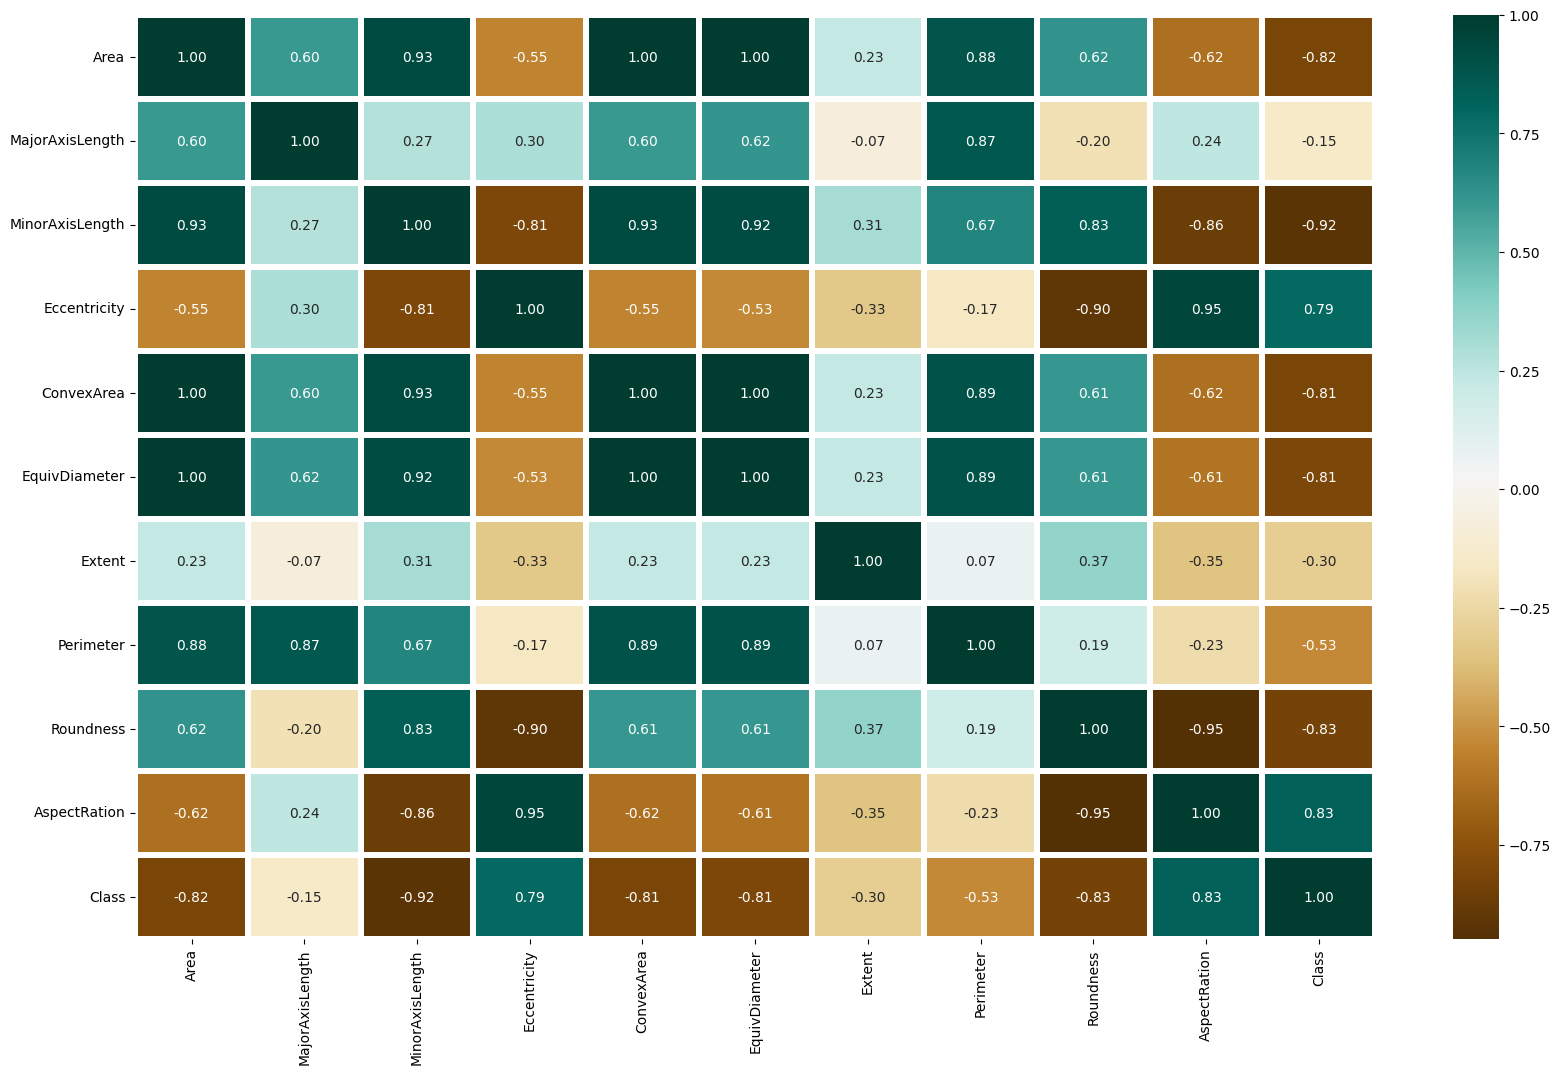

In [ ]:
corr = data.corr()

plt.figure(figsize = (20, 12))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, linewidths = 4, annot = True, fmt = ".2f", cmap="BrBG")
plt.show()

In [ ]:
# Choose a threshold for the correlation coefficient value
threshold = 0.8

# Identify features with correlation coefficient value higher than threshold
high_corr_features = corr_matrix[abs(corr_matrix) > threshold].index

# Remove high correlation features from the dataset
X_reduced = X.drop(high_corr_features, axis=1)

print(X_reduced.head())

   MajorAxisLength  Eccentricity    Extent  Perimeter
0        92.229316      0.719916  0.657536    273.085
1        74.691881      0.725553  0.713009    208.317
2        76.293164      0.731211  0.759153    210.012
3        77.033628      0.738639  0.783529    210.657
4        85.124785      0.749282  0.769375    230.332


In [ ]:
# Create a new DataFrame with only the remaining features
X_reduced_df = pd.DataFrame(X_reduced, columns=X_reduced.columns)
y = data['Class']

print(X_reduced_df.head())

   MajorAxisLength  Eccentricity    Extent  Perimeter
0        92.229316      0.719916  0.657536    273.085
1        74.691881      0.725553  0.713009    208.317
2        76.293164      0.731211  0.759153    210.012
3        77.033628      0.738639  0.783529    210.657
4        85.124785      0.749282  0.769375    230.332


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12729, 4)
(5456, 4)
(12729,)
(5456,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
clf_lr = LogisticRegression()

# Train the classifier on the training data
clf_lr.fit(X_train, y_train)

# Test the classifier on the testing data
acc_lr = clf_lr.score(X_test, y_test)

print("Logistic Regression Accuracy after setting a threshold correlation coefficient:", acc_lr)

Logistic Regression Accuracy after setting a threshold correlation coefficient: 0.9611436950146628


In [ ]:
from sklearn.metrics import classification_report

# Test the classifier on the testing data
y_pred_lr = clf_lr.predict(X_test)

# Calculate the classification report
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Classification Report after setting a threshold correlation coefficient:")
print(report_lr)


Logistic Regression Classification Report after setting a threshold correlation coefficient:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2447
           1       0.96      0.97      0.96      3009

    accuracy                           0.96      5456
   macro avg       0.96      0.96      0.96      5456
weighted avg       0.96      0.96      0.96      5456



[[2340  107]
 [ 105 2904]]


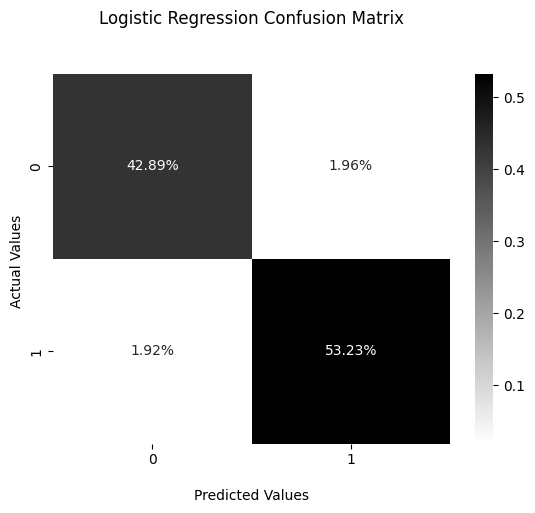

In [ ]:
#evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#plotting Confusion Matrix
cf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(cf_matrix_lr)
ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True, fmt='.2%', cmap='binary')

ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()